# Palmer Penguins - Data Exploration 🗺🧭🐧

Los pingüinos de Palmer son una especie íntimamente asociada a la región de la Península Antártica, específicamente en las proximidades de la Estación Palmer. Esta especie, como otros pingüinos, se destaca por su adaptación a climas fríos y su habilidad para nadar, lo que les permite cazar en el agua. Su dieta consiste principalmente en krill y pequeños peces, elementos abundantes en su hábitat antártico.

Estos pingüinos están enfrentando desafíos significativos debido al cambio climático. La rápida disminución del hielo marino y la alteración de los ecosistemas marinos afectan directamente su capacidad para alimentarse y reproducirse. La pérdida de hielo también reduce los hábitats disponibles para anidar, lo que impacta en sus patrones de reproducción.

El estudio de los pingüinos de Palmer no solo es importante para su conservación, sino también como indicadores de la salud del ecosistema antártico. La monitorización de sus poblaciones ayuda a los científicos a entender mejor los efectos del cambio climático en la región.

![Penguins](https://www.pbs.org/wnet/nature/files/2022/02/ylcQppD-asset-mezzanine-16x9-XcbSdf7-1200x675.jpg)

# Importar librerias 

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Obtener base de datos

In [4]:
penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv').dropna()

# Exploración de datos
## Estableciendo relaciones
### Gráfico de puntos

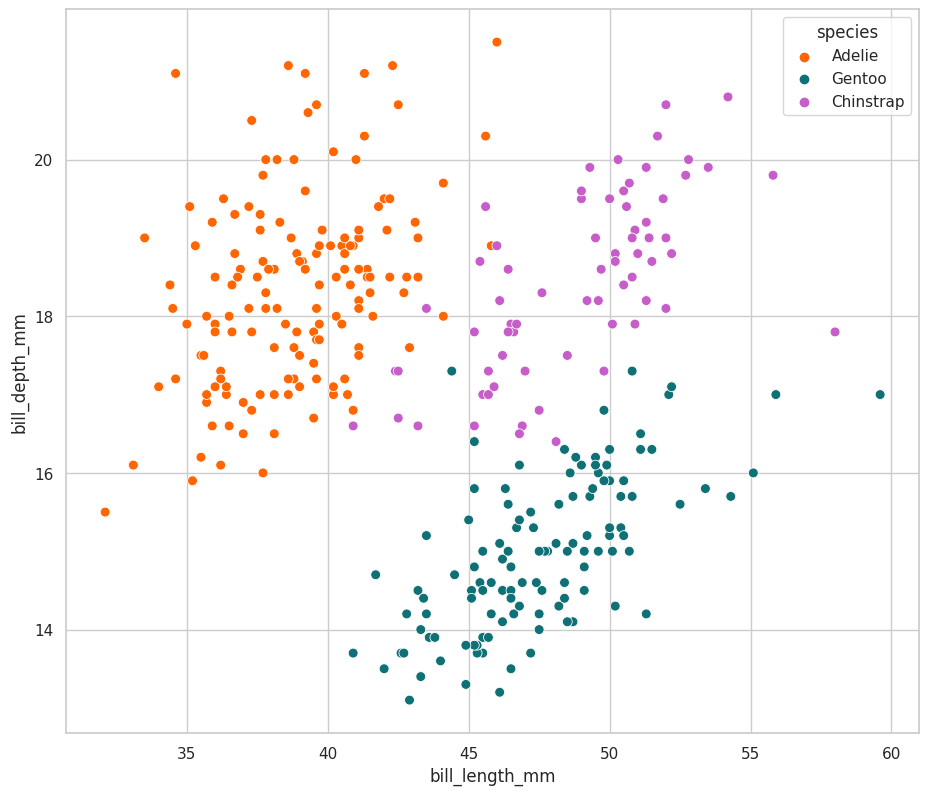

In [5]:
sns.scatterplot(
    data=penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm', 
    hue='species', 
    palette=penguin_color,
    s=50
    );

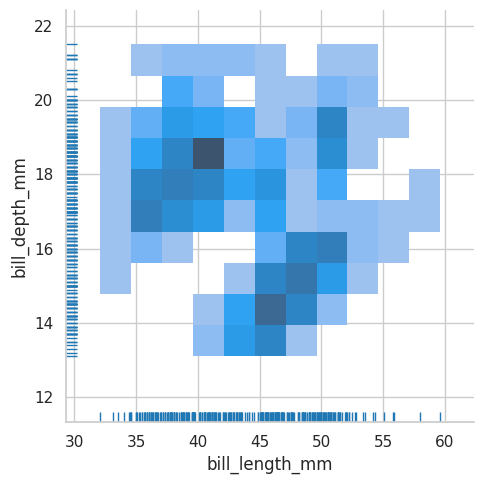

In [6]:
sns.displot(
    data=penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm',
    rug=True
    );

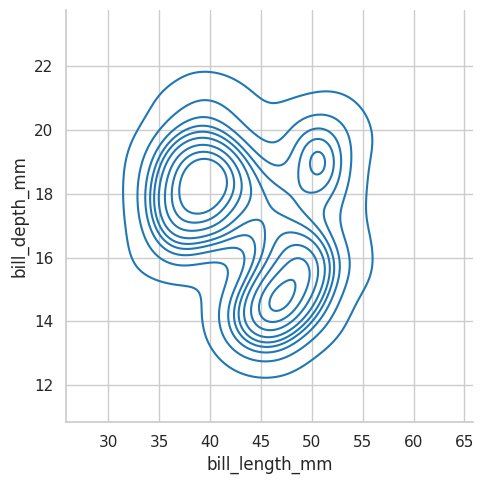

In [7]:
sns.displot(
    data=penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm',
    kind='kde'
    );

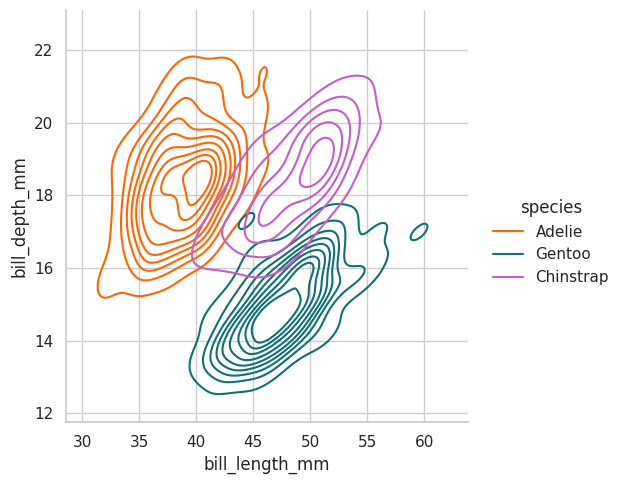

In [8]:
sns.displot(
    data=penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm',
    kind='kde',
    hue='species',
    palette=penguin_color
    );

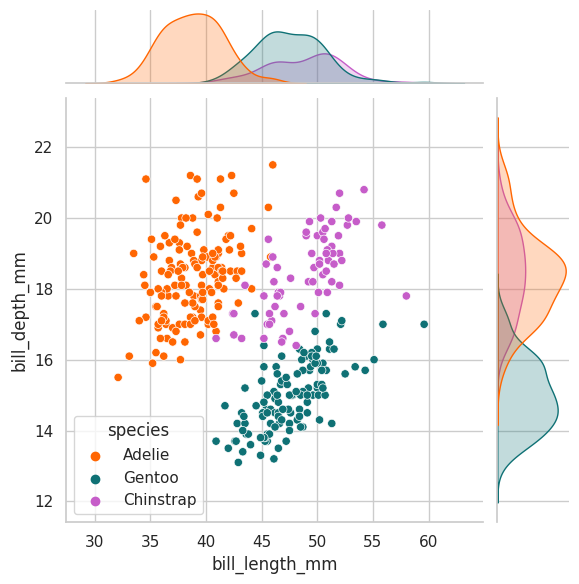

In [9]:
sns.jointplot(
    data=penguins_df, 
    x='bill_length_mm', 
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
    );


## Variables discretas

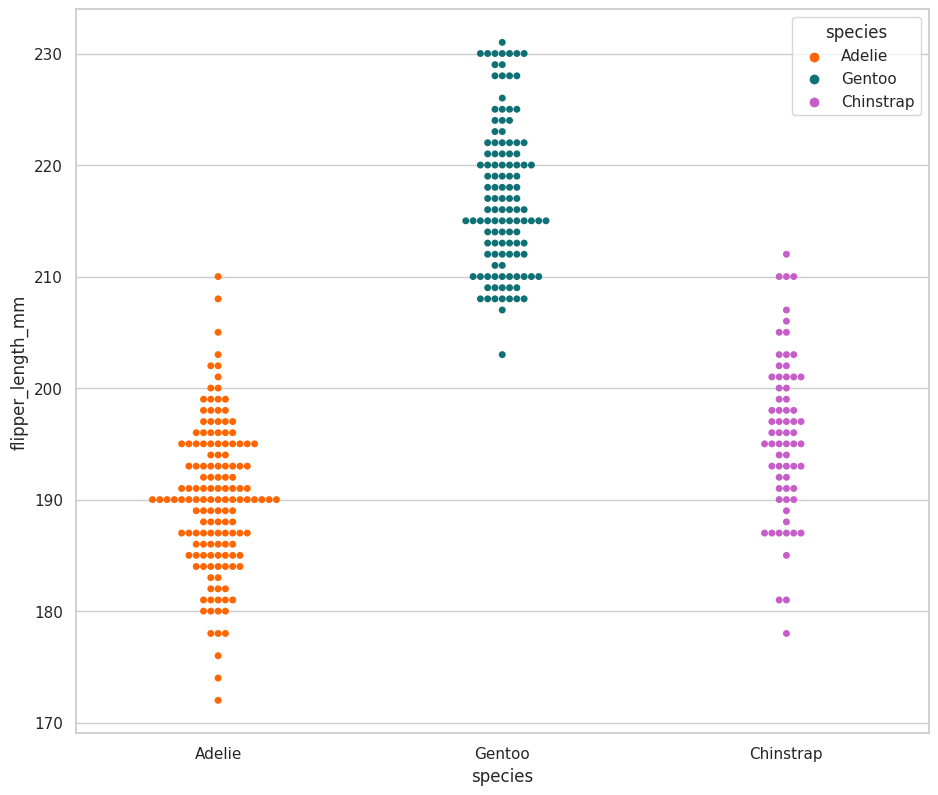

In [10]:
sns.swarmplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
    );

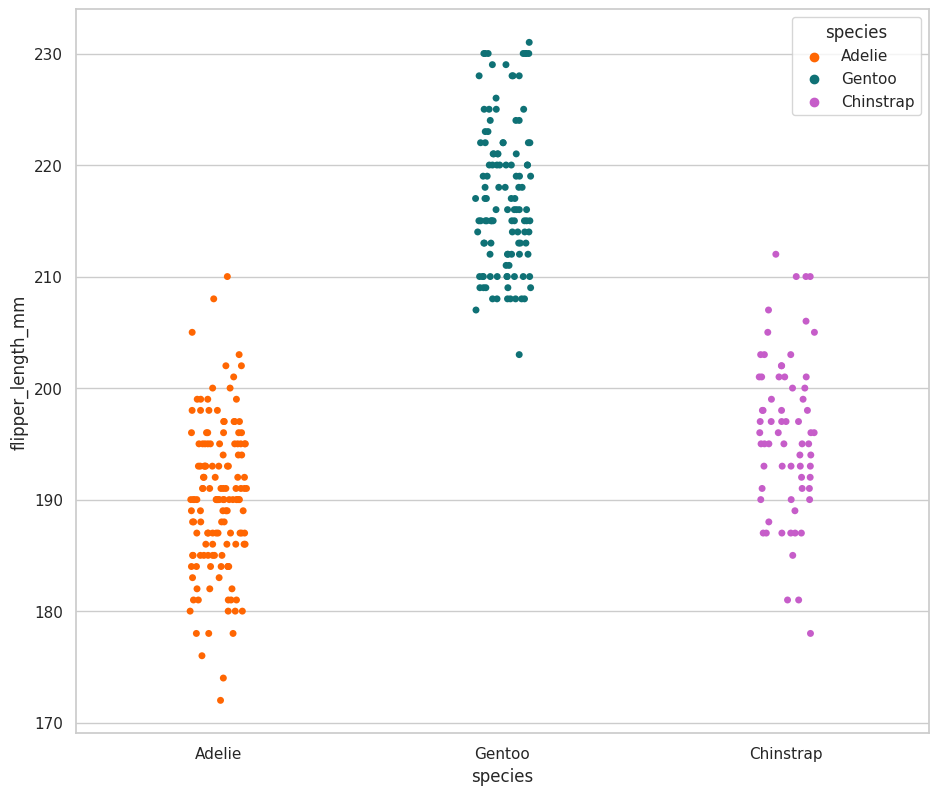

In [11]:
sns.stripplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
    );

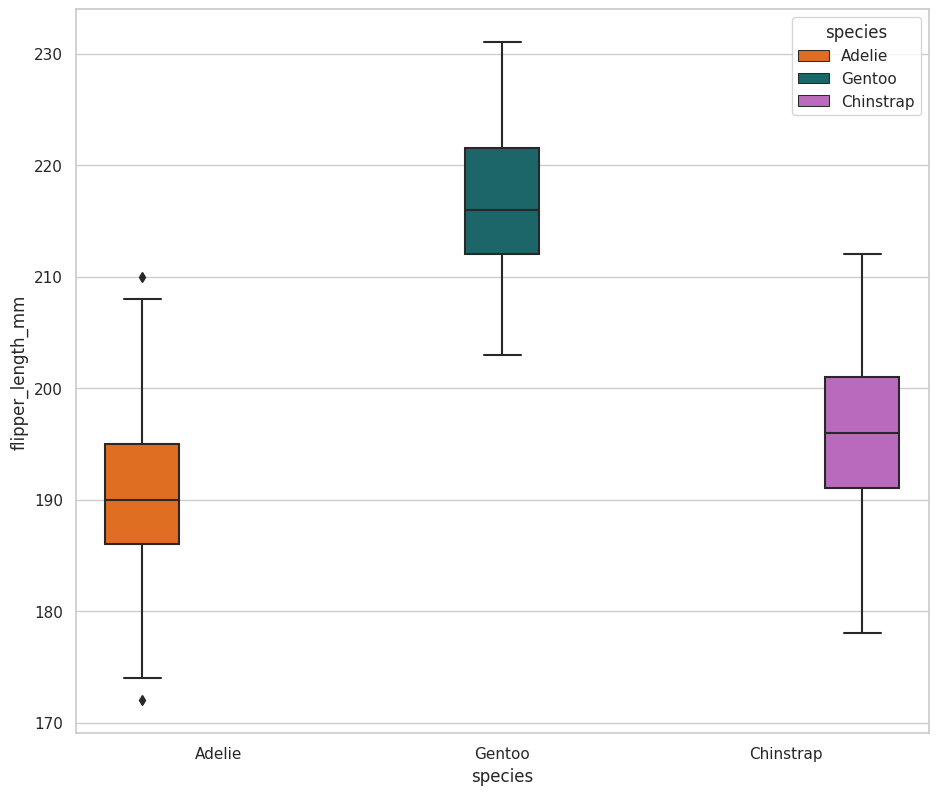

In [12]:
sns.boxplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color       
);


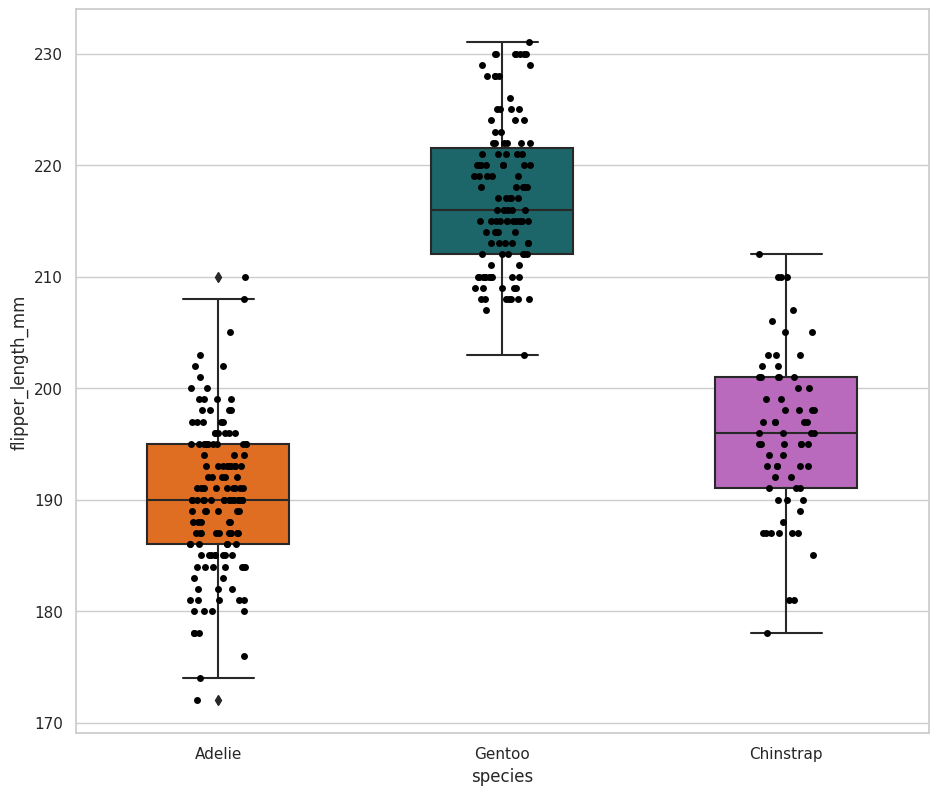

In [13]:
ax=sns.boxplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    palette=penguin_color, 
    width=0.5       
)

ax=sns.stripplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    color='black'    
)

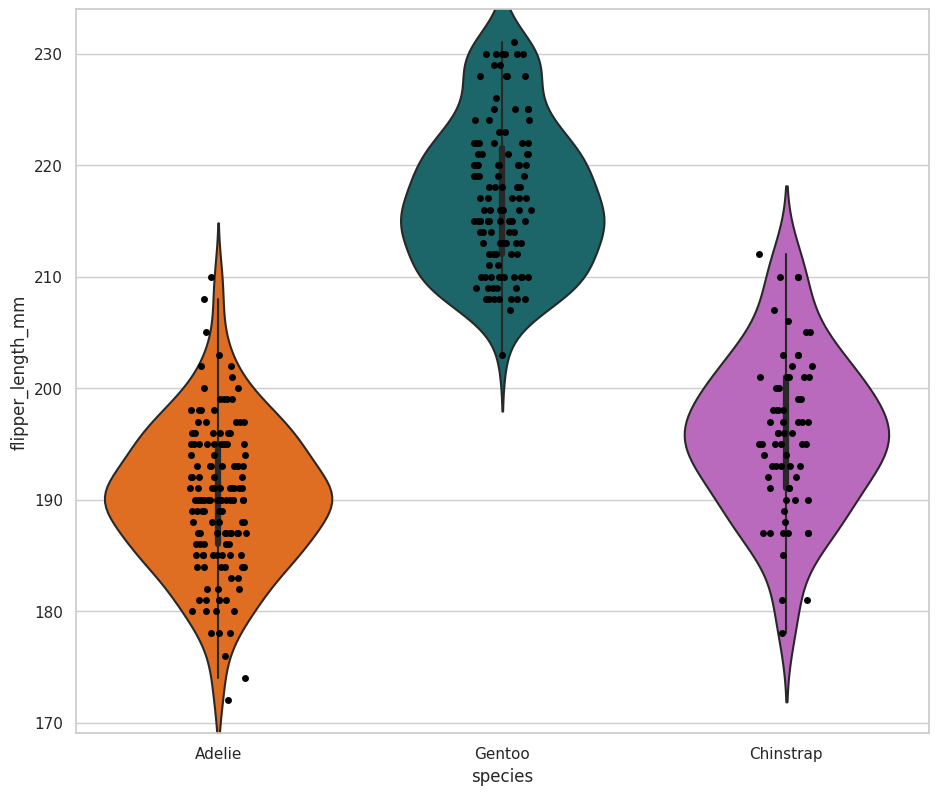

In [14]:
ax=sns.violinplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    palette=penguin_color       
)

ax=sns.stripplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    color='black'    
)

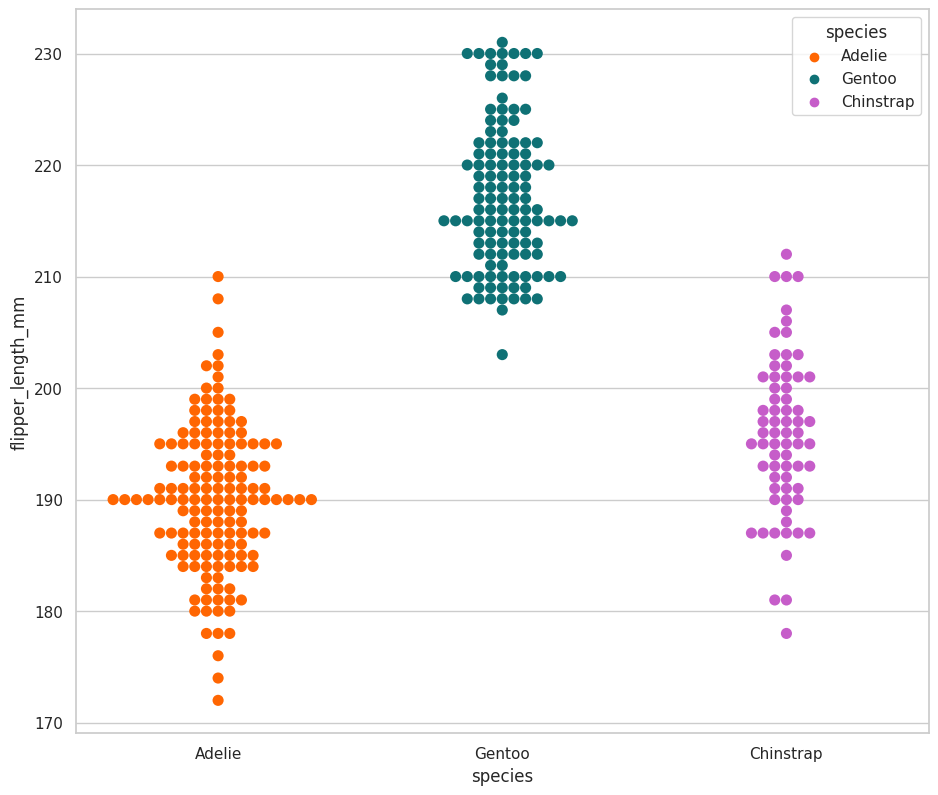

In [15]:
sns.swarmplot(
    data=penguins_df, 
    x='species', 
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color,
    s=8
);

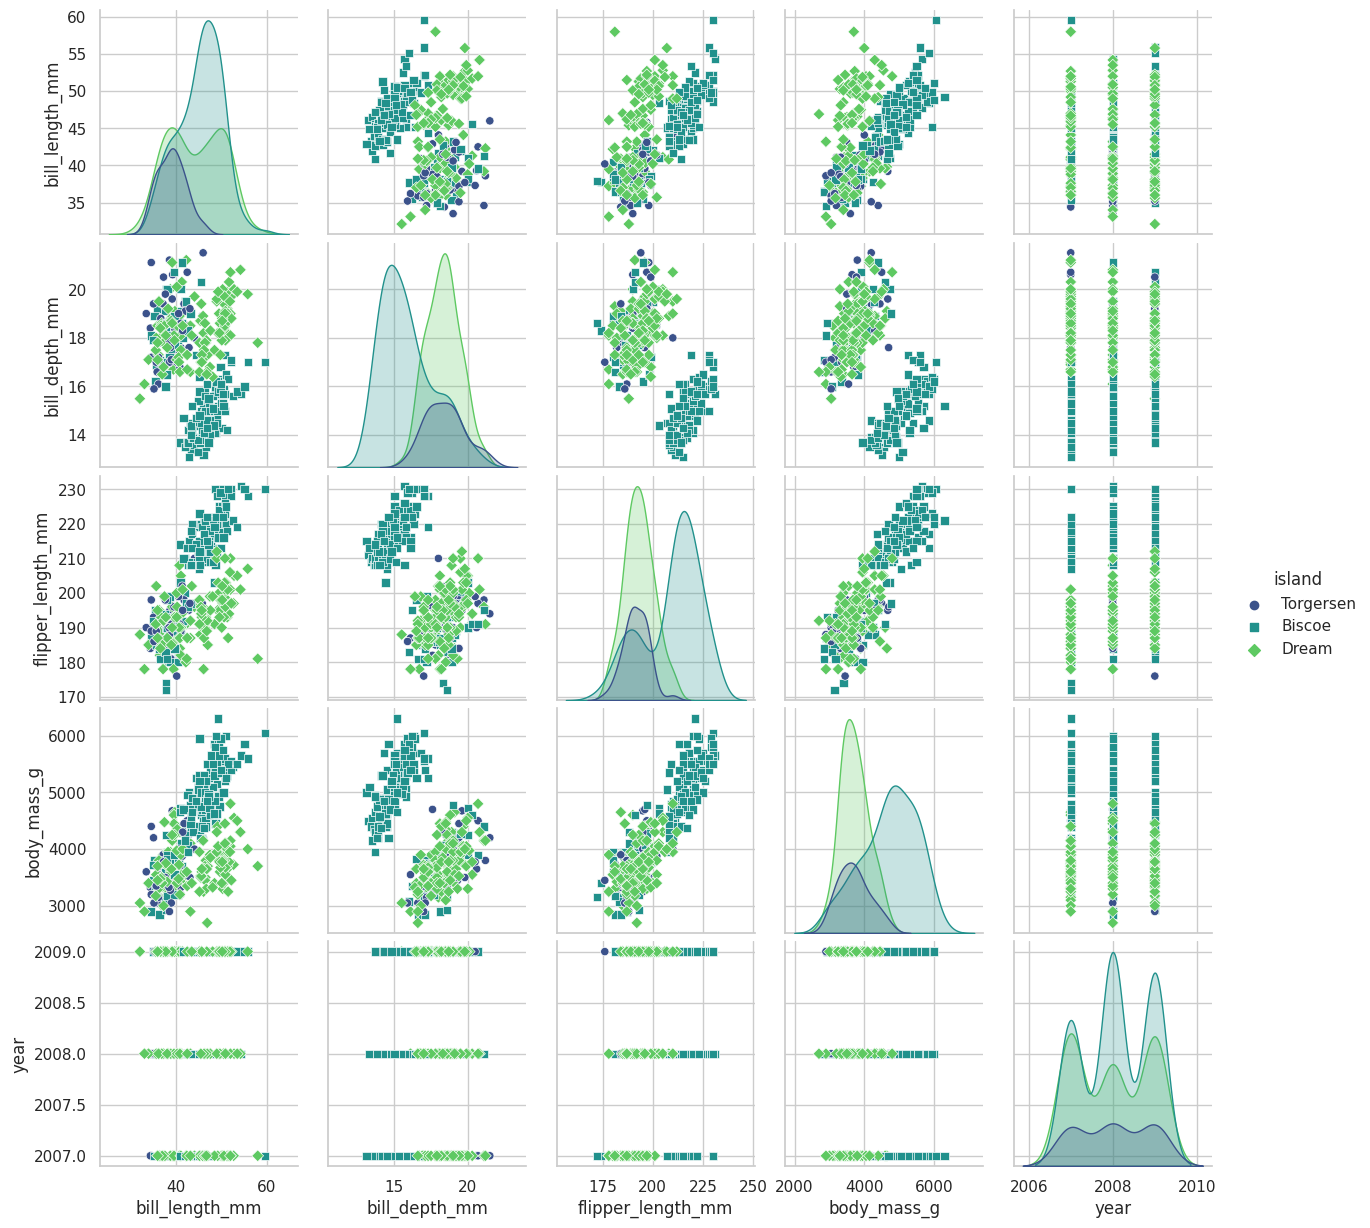

In [16]:
sns.pairplot(
    data=penguins_df, 
    hue='island',
    palette='viridis',
    markers=['o', 's', 'D']
    );

## Matrices de correlación

/tmp/ipykernel_1632/3122807371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.drop('year', axis=1).corr(),


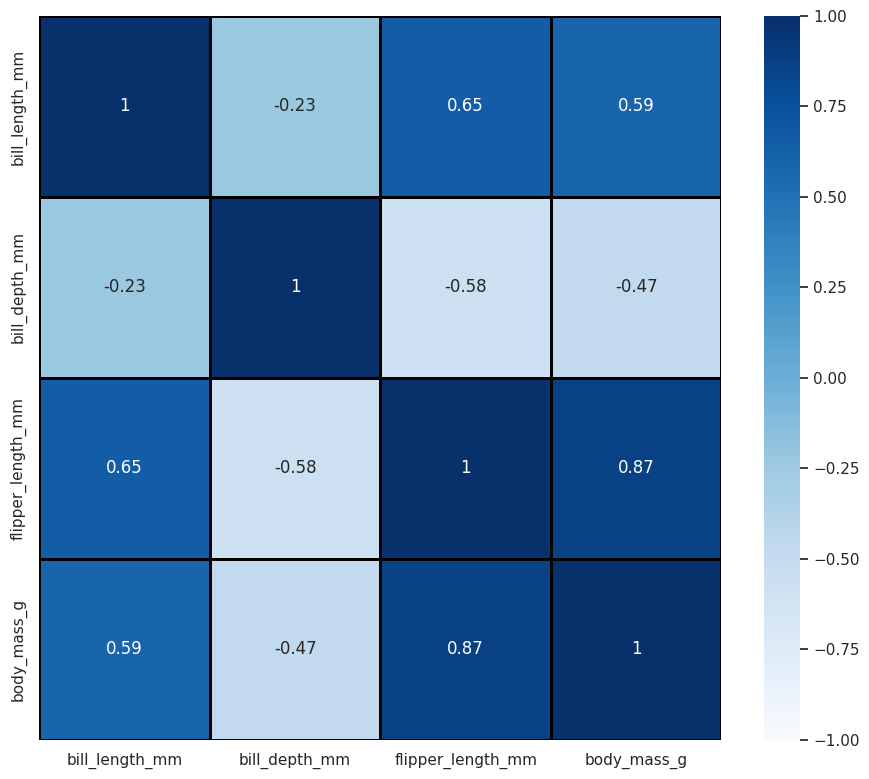

In [17]:
sns.heatmap(
    penguins_df.drop('year', axis=1).corr(), 
    annot=True, 
    cmap='Blues', 
    center=0,
    linewidths=2,
    linecolor='black',
    vmin=-1,
    vmax=1
    );

/tmp/ipykernel_1632/3271188701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.drop('year', axis=1).corr(),


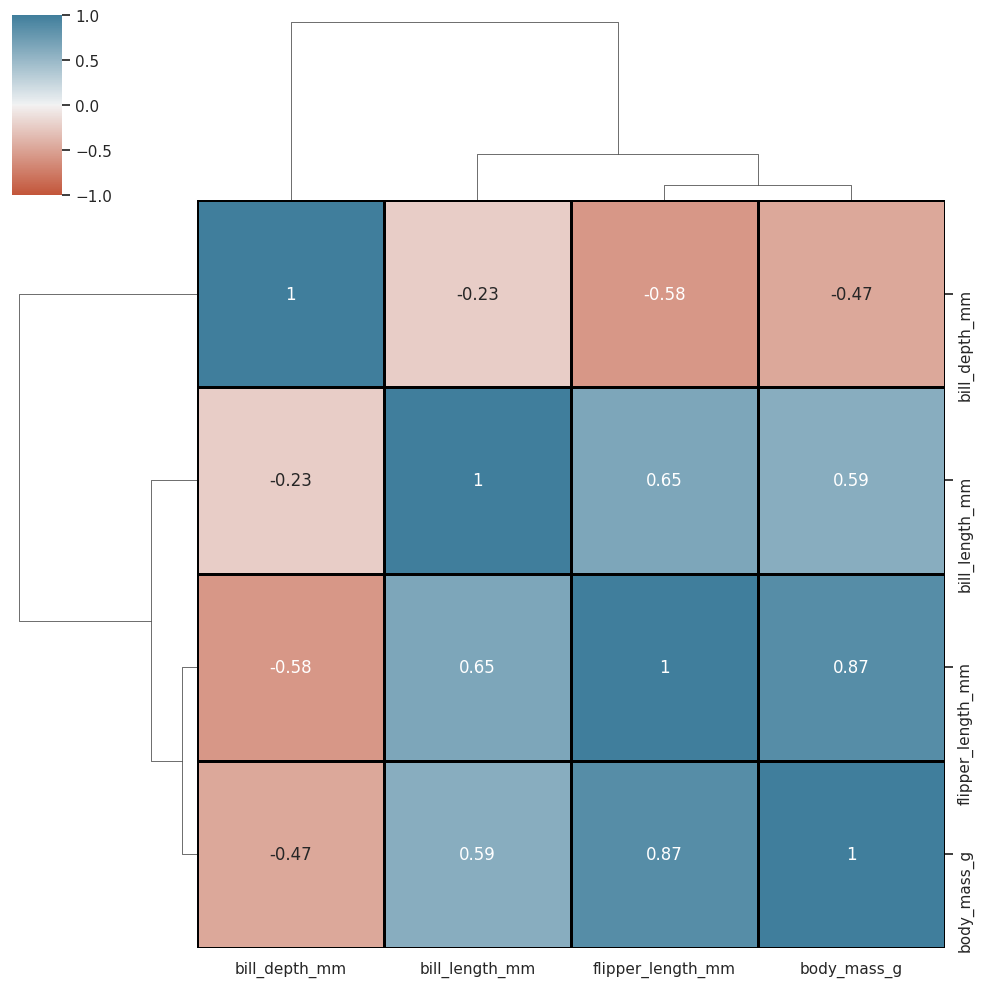

In [18]:
sns.clustermap(
    penguins_df.drop('year', axis=1).corr(), 
    annot=True, 
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    linewidths=2,
    linecolor='black',
    vmin=-1,
    vmax=1
    );

In [19]:
penguins_df=(
    penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'], [0,1])
    )
)

/tmp/ipykernel_1632/3980072382.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.drop('year',axis=1).corr(),


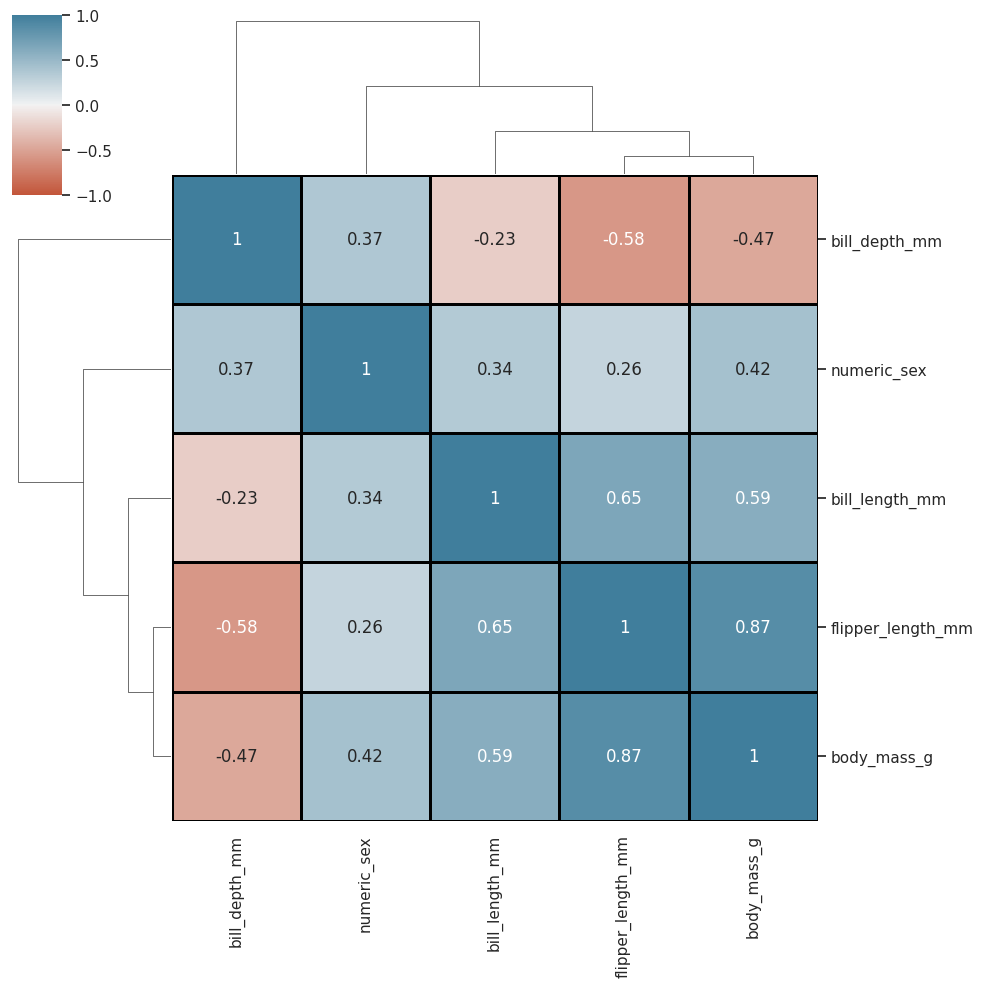

In [20]:
sns.clustermap(
    penguins_df.drop('year',axis=1).corr(), 
    annot=True, 
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    linewidths=2,
    linecolor='black',
    vmin=-1,
    vmax=1
    );

In [21]:
penguins_df.corr().style.highlight_between(left=0.65, right=.99,color='green')

/tmp/ipykernel_1632/2452000846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_df.corr().style.highlight_between(left=0.65, right=.99,color='green')


# Limitantes de coeficientes de correlacion lineal

In [22]:
x=np.linspace(-100, 100, 100)
y=x**3
y+=np.random.normal(0, 100, x.size)

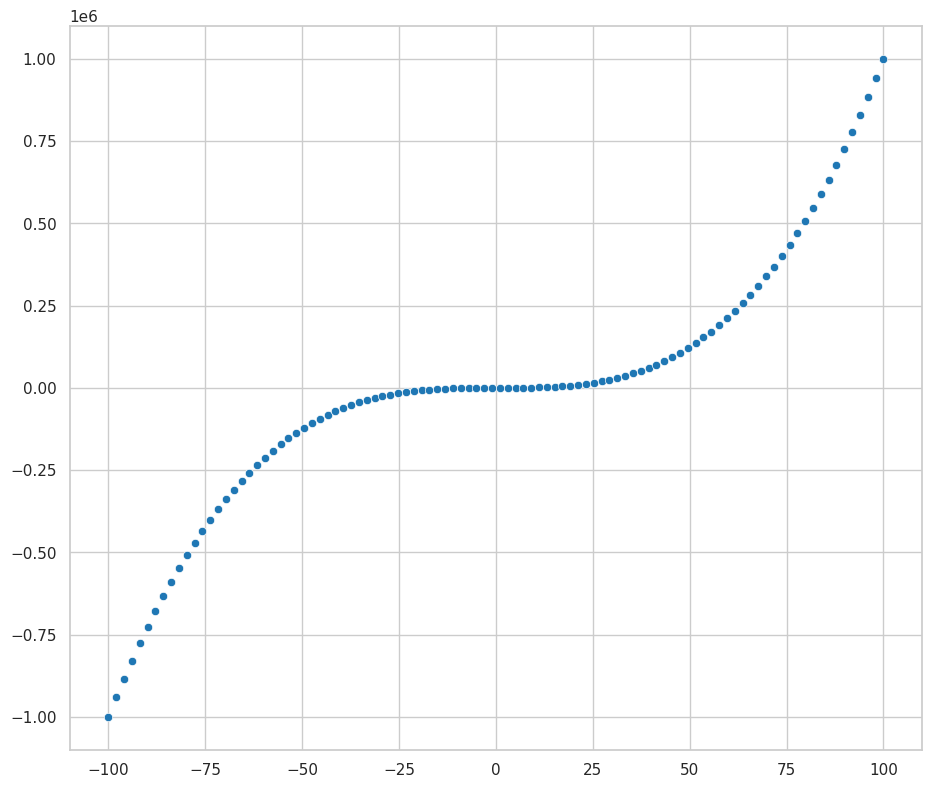

In [23]:
sns.scatterplot(
    x=x, 
    y=y
    );

In [24]:
np.corrcoef(x, y)

array([[1.        , 0.91656136],
       [0.91656136, 1.        ]])

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


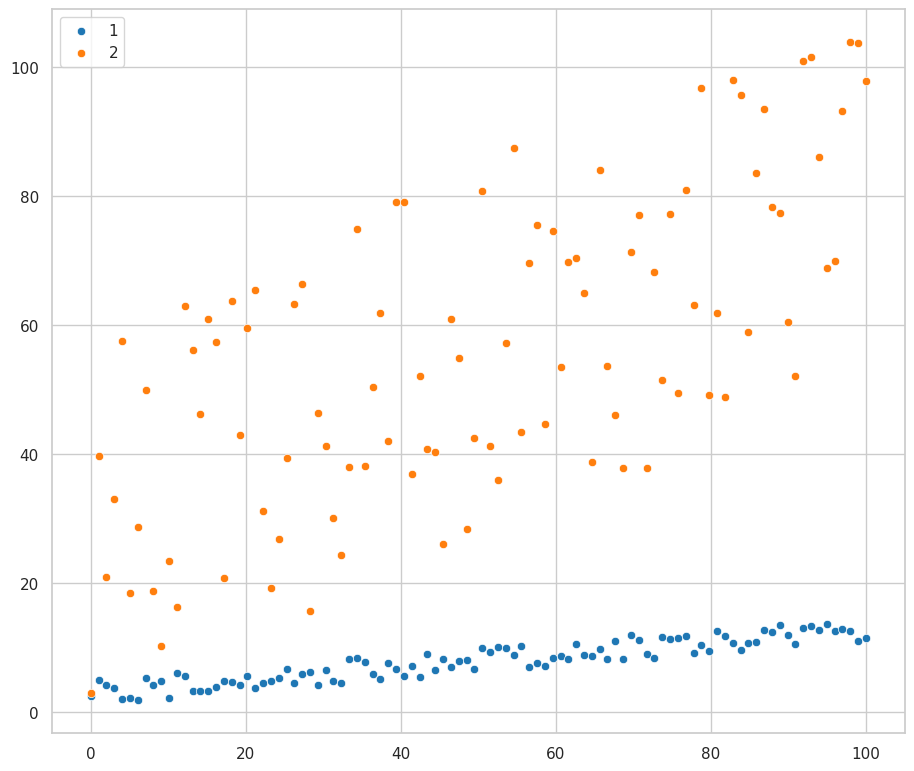

In [25]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Establecer relaciones
## Regresión lineal simple
### Calcular la fuerza del efecto

In [26]:
res_1=scipy.stats.linregress(x=x_1, y=y_1)
res_2=scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


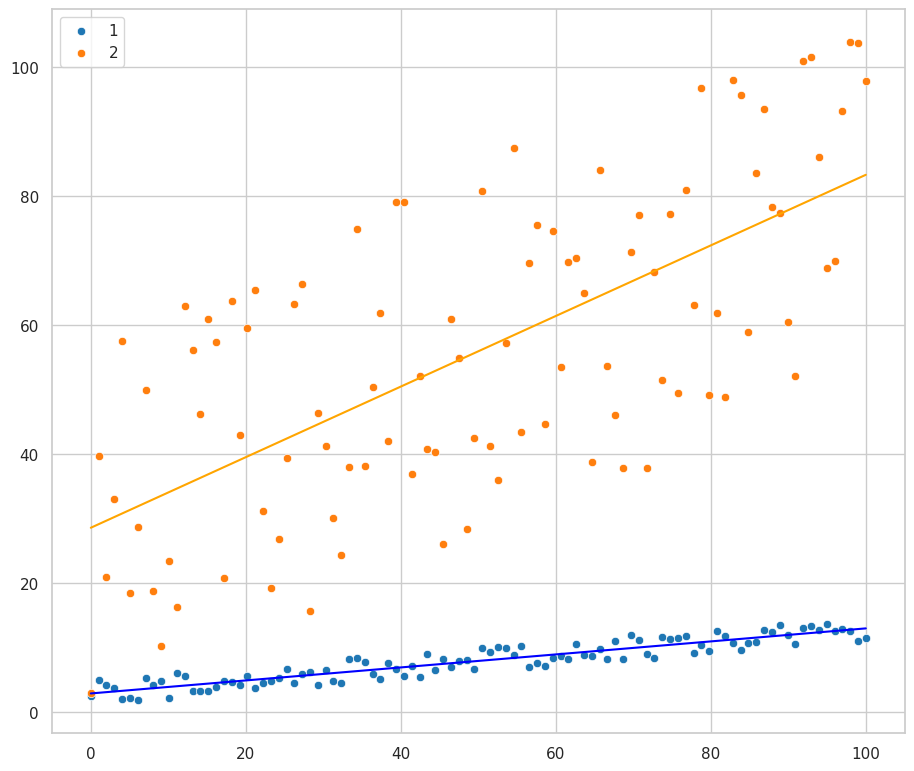

In [27]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1=np.array([x_1.min(), x_1.max()])
fy_1=res_1.intercept+res_1.slope*fx_1

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2=np.array([x_2.min(), x_2.max()])
fy_2=res_2.intercept+res_2.slope*fx_2

plt.plot(fx_1, fy_1, c='blue')
plt.plot(fx_2, fy_2, c='orange')

plt.legend(labels=['1', '2'])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


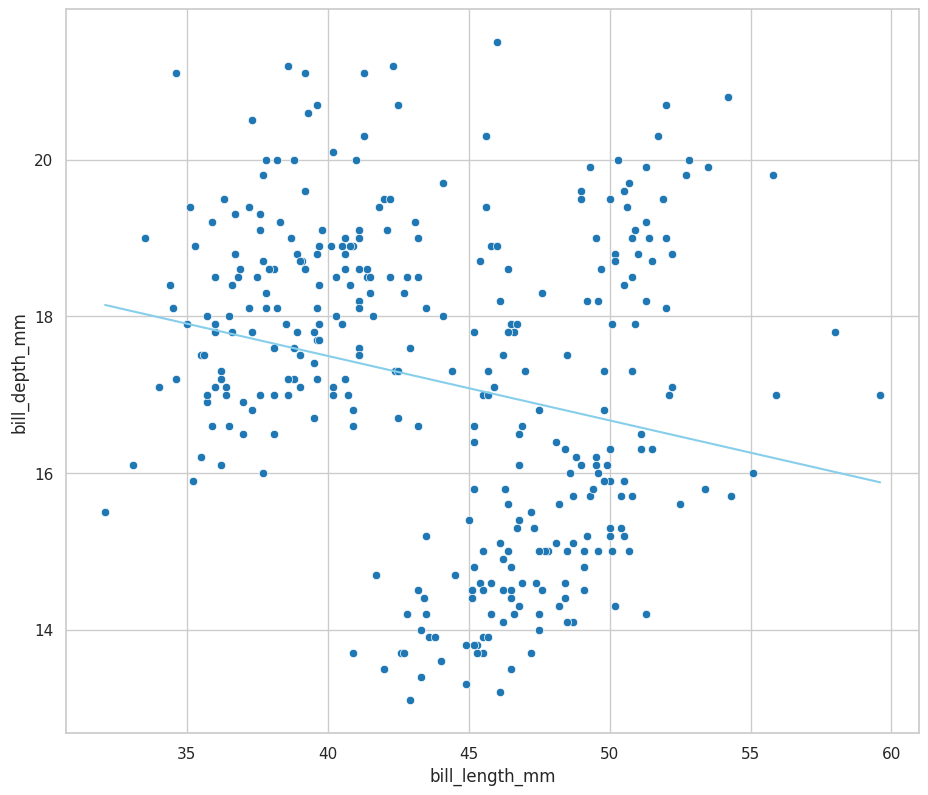

In [28]:
sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

res_penguin=scipy.stats.linregress(
    x=penguins_df.bill_length_mm, 
    y=penguins_df.bill_depth_mm
)
print(res_penguin)

fx_1=np.array([penguins_df.bill_length_mm.min(), penguins_df.bill_length_mm.max()])
fy_1=res_penguin.intercept+res_penguin.slope*fx_1

plt.plot(fx_1, fy_1, c='skyblue')

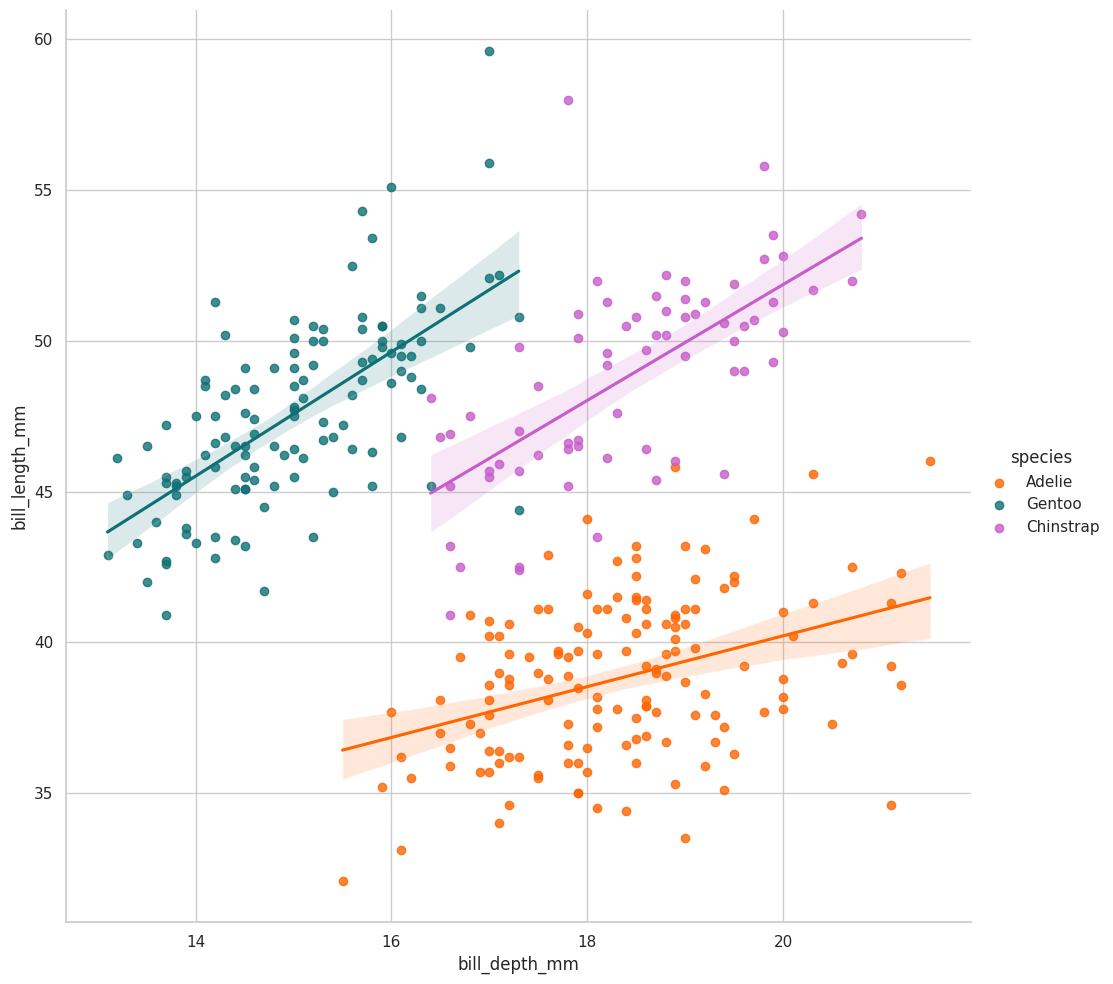

In [29]:
sns.lmplot(
    data=penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    height=10,
    hue='species',
    palette=penguin_color
)

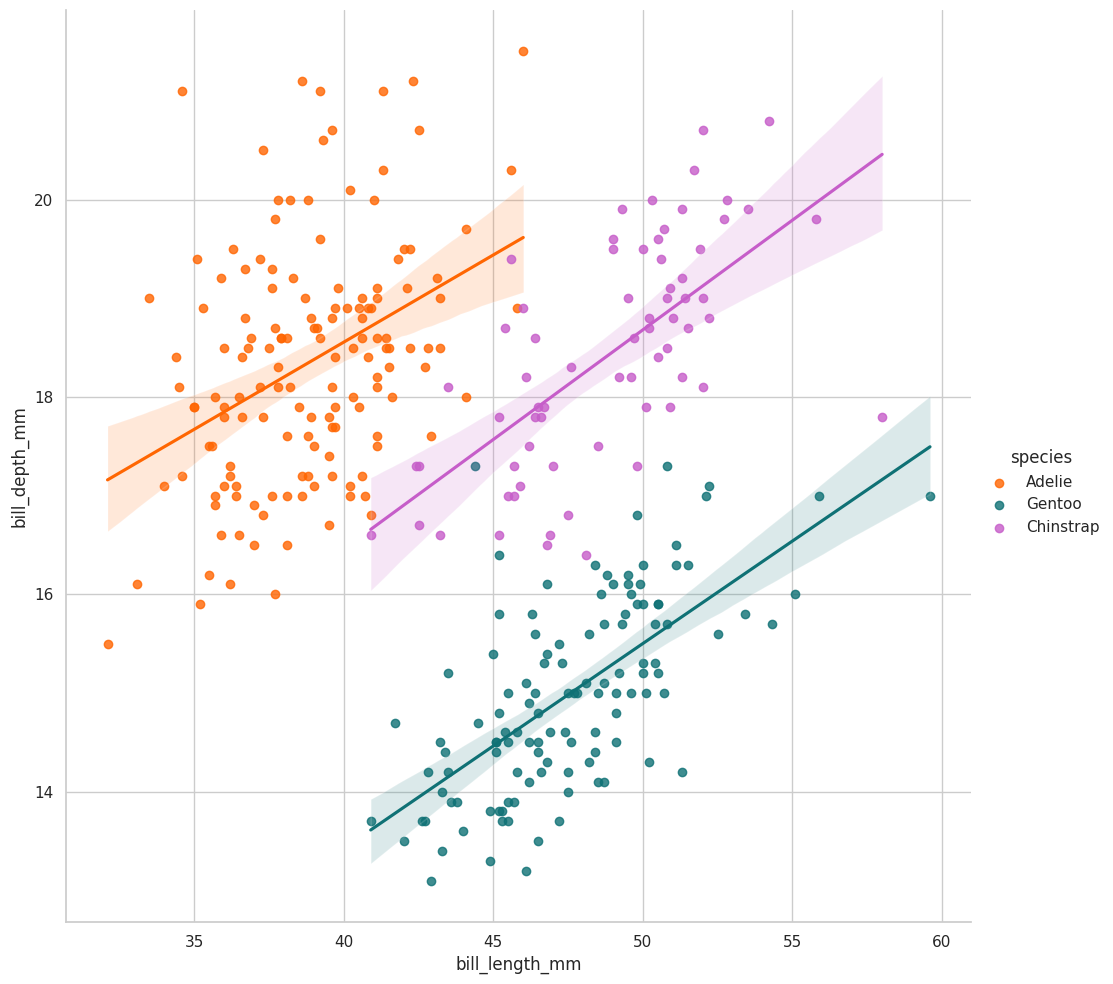

In [30]:
sns.lmplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species',
    palette=penguin_color
)

In [31]:
x=penguins_df.bill_length_mm
y=penguins_df.bill_depth_mm

res_x_y=scipy.stats.linregress(x=x, y=y)
print(f"X contra Y: {res_x_y}")
res_y_x=scipy.stats.linregress(x=y, y=x)
print(f"Y contra X: {res_y_x}")

X contra Y: LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
Y contra X: LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


### La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [32]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [33]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

In [34]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm + species',
        data=penguins_df
    )
    .fit()
    .params
) 

Intercept               13.109133
species[T.Chinstrap]     9.907077
species[T.Gentoo]       13.440202
bill_depth_mm            1.401563
dtype: float64

In [37]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.53e-05
Time:                        21:54:36   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis de regresión múltiple
## Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?
### Creando modelos

#### Modelo 1

In [38]:
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.54e-32
Time:                        21:54:40   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [41]:
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
         data=penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.04e-46
Time:                        21:55:59   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [42]:
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.26e-103
Time:                        21:56:20   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [43]:
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.28e-122
Time:                        21:58:30   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [45]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm +C(sex)",
         data=penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.53e-118
Time:                        22:00:48   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 6

In [95]:
model_6 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_depth_mm + C(species) +C(sex)",
        data=penguins_df
    )
    .fit()
)

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     447.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.85e-144
Time:                        22:28:04   Log-Likelihood:                -2357.3
No. Observations:                 333   AIC:                             4727.
Df Residuals:                     327   BIC:                             4749.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1211.5343    567.716     -2.134      0.034   -2328.370     -94.698
C(species)[T.Chinstrap]   -78.8989     45.498     -1.734      0.084    -168.404      10.606
C(species)[T.Gentoo]     1153.9863    118.582      9.732      0.000     920.706    1387.267
C(sex)[T.male]            435.4328     44.800      9.720      0.000     347.301     523.564
flipper_length_mm          17.5445      2.866      6.121      0.000      11.906      23.183
bill_depth_mm              74.3830     19.708      3.774      0.000      35.612     113.154
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.933
Skew:                           0.120   Prob(JB):                        0.627
Kurtosis:                       2.902   Cond. No.                     7.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 7

In [84]:
model_7 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + bill_depth_mm  + bill_length_mm + C(species) +C(sex)",
        data=penguins_df
    )
    .fit()
)

model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.82e-144
Time:                        22:26:26   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1460.9946    571.308     -2.557      0.011   -2584.911    -337.079
C(species)[T.Chinstrap]  -251.4767     81.079     -3.102      0.002    -410.980     -91.973
C(species)[T.Gentoo]     1014.6267    129.561      7.831      0.000     759.746    1269.507
C(sex)[T.male]            389.8915     47.848      8.148      0.000     295.761     484.022
flipper_length_mm          15.9502      2.910      5.482      0.000      10.226      21.674
bill_depth_mm              67.2176     19.742      3.405      0.001      28.380     106.055
bill_length_mm             18.2044      7.106      2.562      0.011       4.225      32.184
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.871
Skew:                           0.124   Prob(JB):                        0.647
Kurtosis:                       2.959   Cond. No.                     7.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 8

## Visualizando resultados
### Creación de tabla de resultados

In [96]:
models_results=pd.DataFrame(
    dict(
        actual_value=penguins_df.body_mass_g,
        prediction_model_1=model_1.predict(),
        prediction_model_2=model_2.predict(),
        prediction_model_3=model_3.predict(),
        prediction_model_4=model_4.predict(),
        prediction_model_5=model_5.predict(),
        prediction_model_6=model_6.predict(),
        prediction_model_7=model_7.predict(),
        species=penguins_df.species,
        sex=penguins_df.sex
    )
)
models_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5  prediction_model_6  \
0           3579.136946         3441.323750         3790.415641   
1           3343.220772         3328.384372         3346.007363   
2           3639.137335         3751.223949         3548.537675   
4           3457.954243         3657.259599         3610.146624   
5           3764.536023         3864.163327         4089.643900   
..                  ...                 ...                 ...   
339         4455.022405         4662.860306         4249.495059   
340         3894.857519         4080.099176         3599.888578   
341         4063.639819         4005.109853         3884.859217   
342         4652.013882         4803.806832         4242.622127   
343         3672.299099         3892.170475         3574.340404   

     prediction_model_7    species     sex  
0           3784.654450     Adelie    male  
1           3394.413006     Adelie  female  
2           3592.859351     Adelie  female  
4           3582.805840     Adelie  female  
5           4059.561060     Adelie    male  
..                  ...        ...     ...  
339         4325.837513  Chinstrap    male  
340         3518.010318  Chinstrap  female  
341         3882.118393  Chinstrap    male  
342         4228.892011  Chinstrap    male  
343         3616.509573  Chinstrap  female  

[333 rows x 10 columns]

### ECDFs

<AxesSubplot: ylabel='Proportion'>

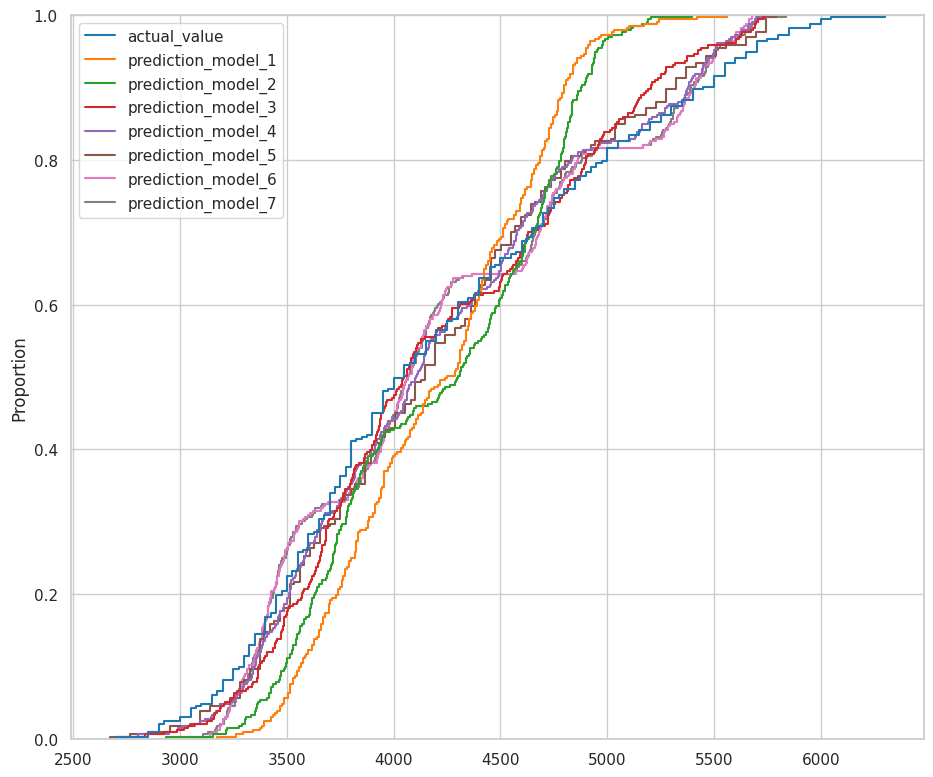

In [87]:
sns.ecdfplot(
    data=models_results)


<AxesSubplot: ylabel='Proportion'>

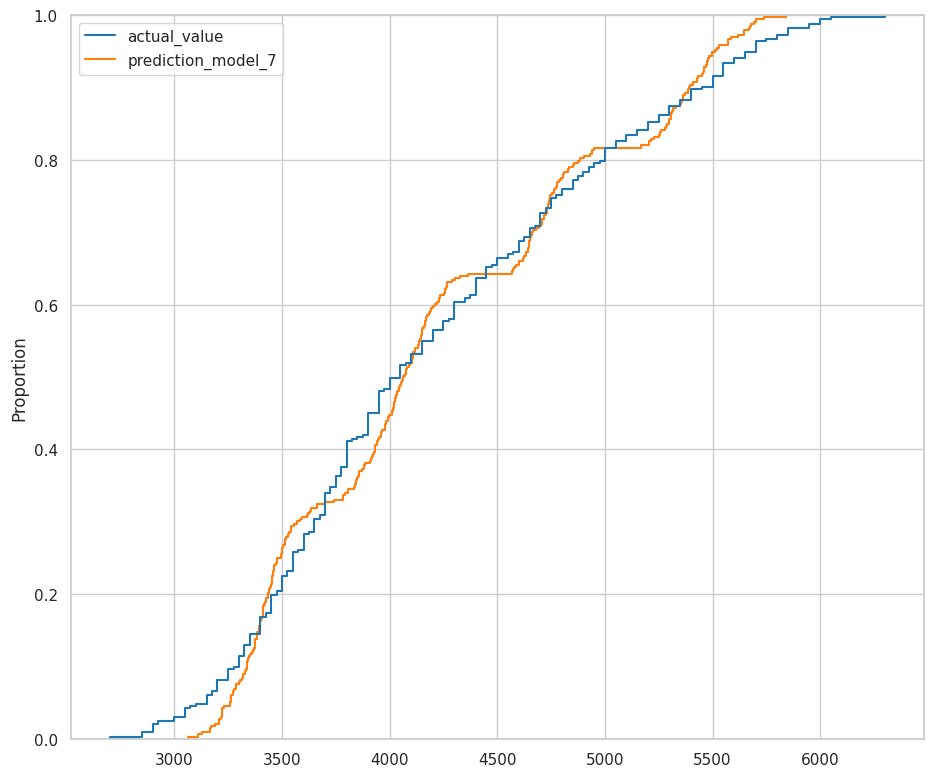

In [92]:
sns.ecdfplot(
    data=models_results.select_columns('actual_value', 'prediction_model_7')
)

#### PDFs

<AxesSubplot: ylabel='Density'>

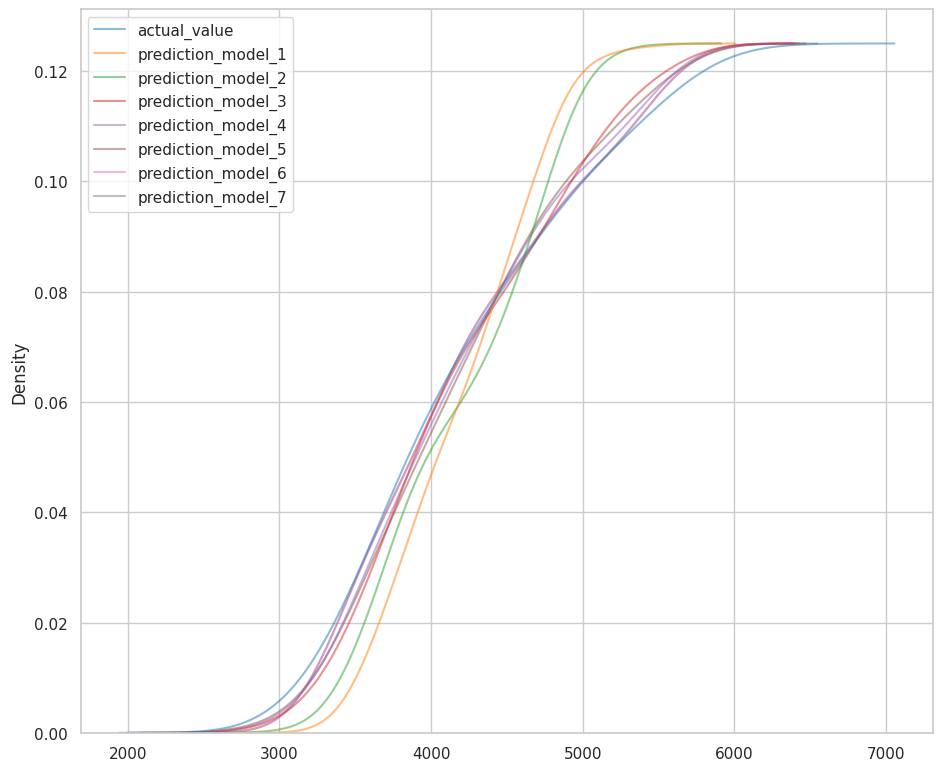

In [89]:
sns.kdeplot(
    data=models_results, 
    alpha=0.5,
    cumulative=True
)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

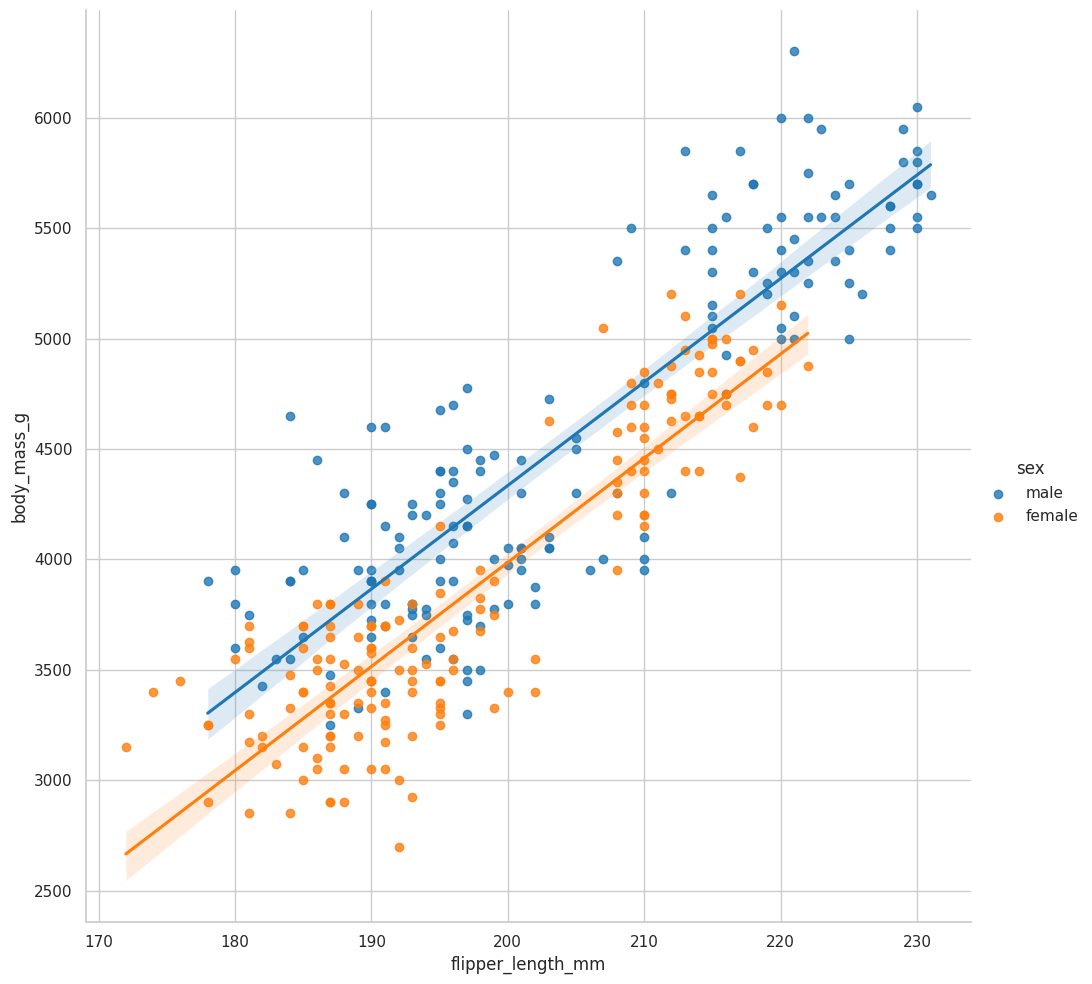

In [90]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

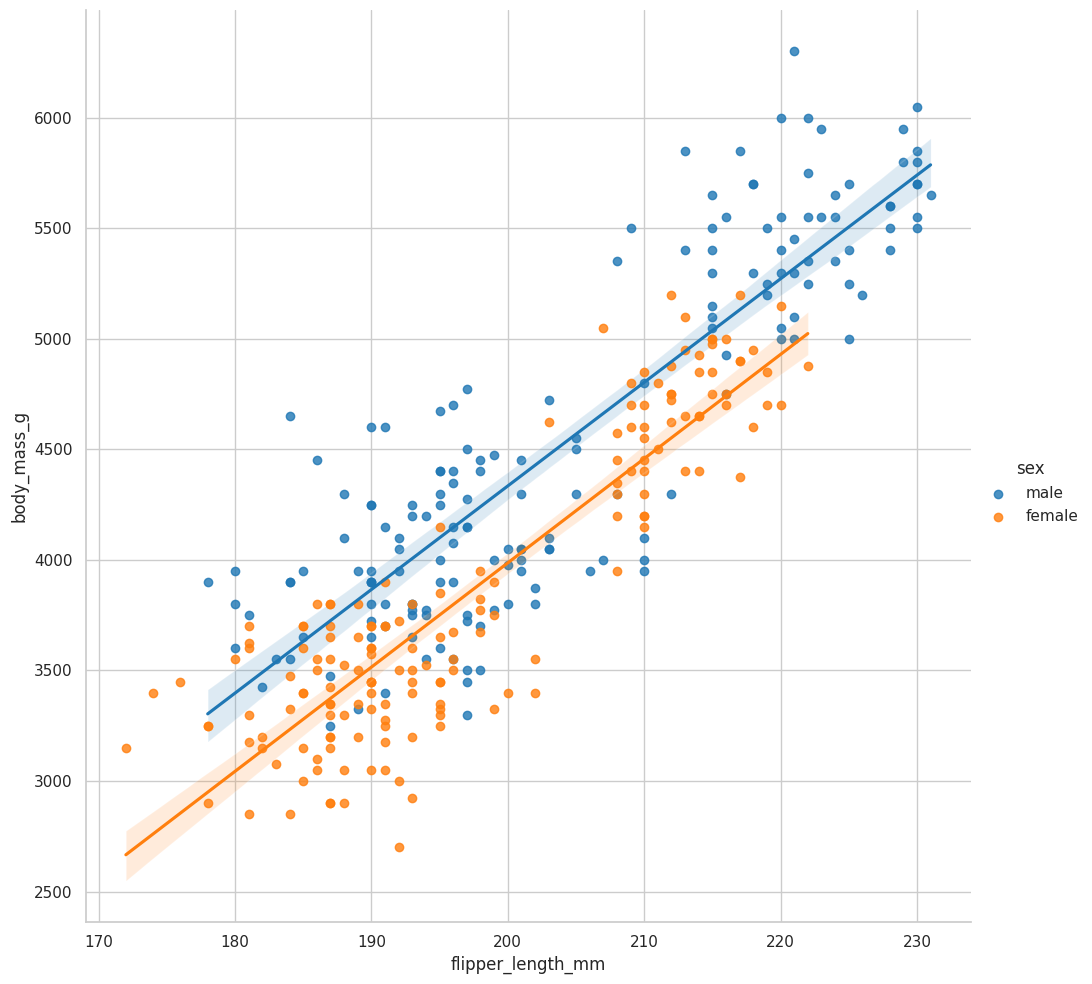

In [91]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

### Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [97]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                  0.4793
Time:                        22:32:30   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

### Exploración de nuestras variables categóricas

In [100]:
(
    penguins_df
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

### ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

In [125]:
penguins_df_gentoo=(
    penguins_df
    .assign(
        is_Gentoo=lambda df: df.species.replace(['Gentoo', 'Adelie', 'Chinstrap'], [1, 0, 0]),
        )
)

In [126]:
penguins_df_gentoo.head(2)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  year  numeric_sex  is_Gentoo  
0       3750.0    male  2007            1          0  
1       3800.0  female  2007            0          0

In [127]:
penguins_df_gentoo.value_counts('is_Gentoo')

is_Gentoo
0    214
1    119
dtype: int64

In [128]:
model_is_gentoo=smf.logit(
    formula='is_Gentoo ~ flipper_length_mm + C(sex)',
    data=penguins_df_gentoo
).fit()

model_is_gentoo.params

Optimization terminated successfully.
         Current function value: 0.029010
         Iterations 12


Intercept           -183.834209
C(sex)[T.male]        -6.907611
flipper_length_mm      0.904854
dtype: float64

In [129]:
is_gentoo_predictions=pd.DataFrame(
    dict(
        actual_value=penguins_df_gentoo.is_Gentoo,
        predicted_values=model_is_gentoo.predict().round(),
    )
)
is_gentoo_predictions

actual_value  predicted_values
0               0               0.0
1               0               0.0
2               0               0.0
4               0               0.0
5               0               0.0
..            ...               ...
339             0               0.0
340             0               0.0
341             0               0.0
342             0               0.0
343             0               0.0

[333 rows x 2 columns]

In [130]:
(
    is_gentoo_predictions
    .value_counts(['actual_value', 'predicted_values'])
    .reset_index(name='count')
)

actual_value  predicted_values  count
0             0               0.0    213
1             1               1.0    116
2             1               0.0      3
3             0               1.0      1

In [131]:
print(
sklearn.metrics.confusion_matrix(
    is_gentoo_predictions.actual_value,
    is_gentoo_predictions.predicted_values
)
)

sklearn.metrics.accuracy_score(
    is_gentoo_predictions.actual_value,
    is_gentoo_predictions.predicted_values
)

[[213   1]
 [  3 116]]


0.987987987987988

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

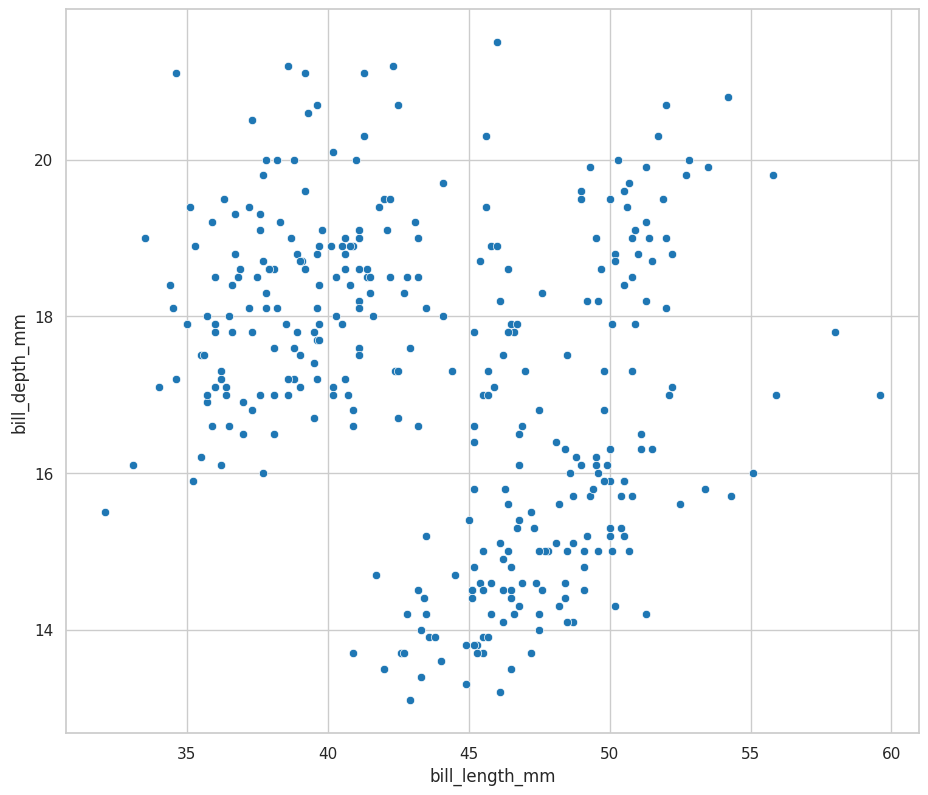

In [133]:
sns.scatterplot(
    data=penguins_df_gentoo,
    x='bill_length_mm',
    y='bill_depth_mm',
)

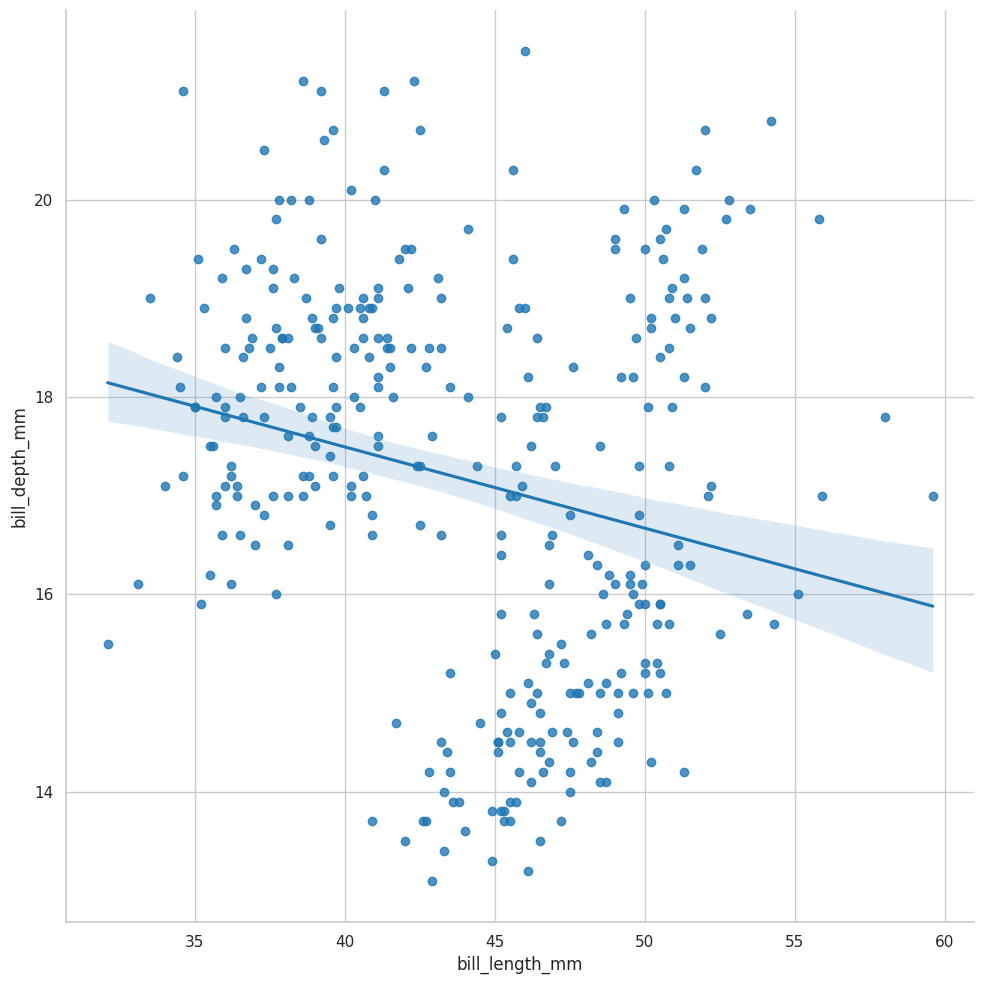

In [135]:
sns.lmplot(
    data=penguins_df_gentoo,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
)

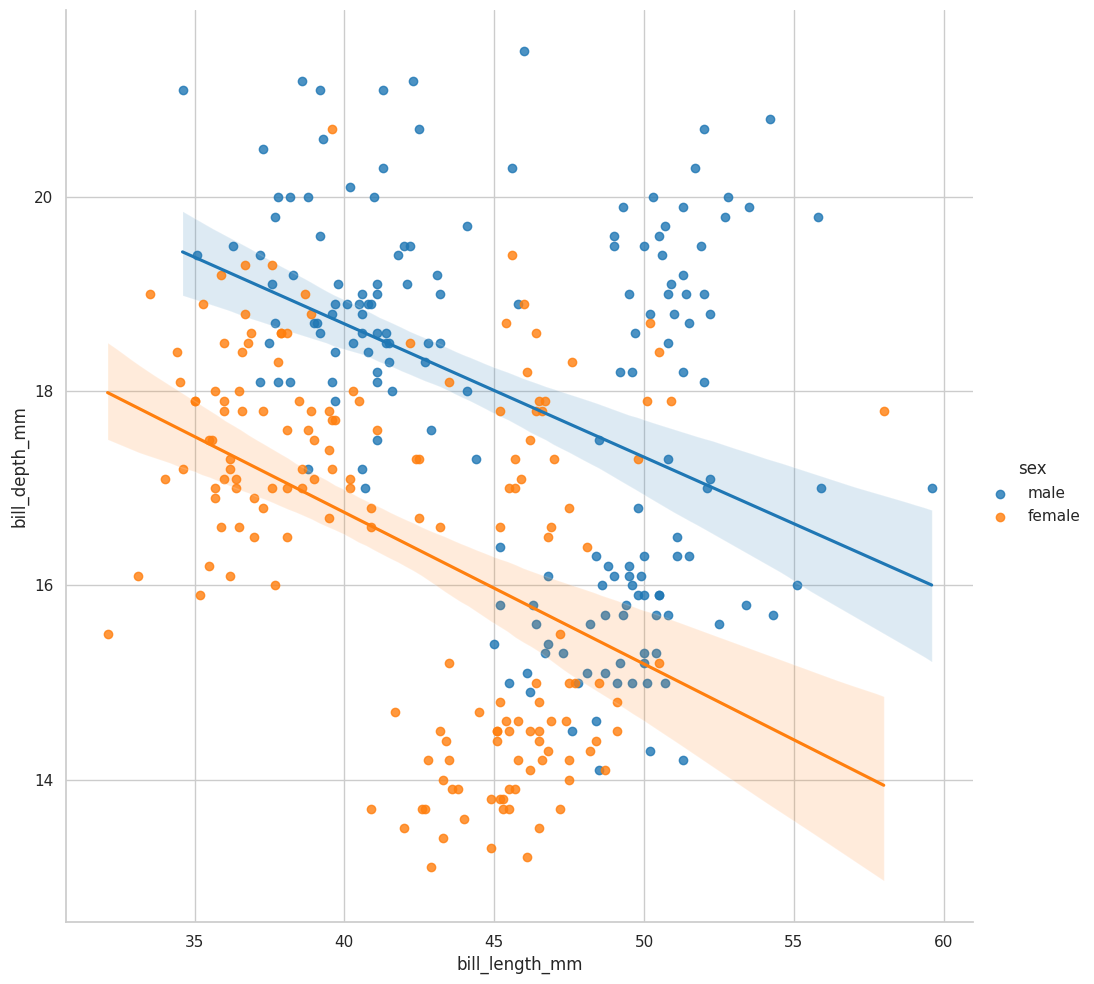

In [137]:
sns.lmplot(
    data=penguins_df_gentoo,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='sex',
    height=10,
)

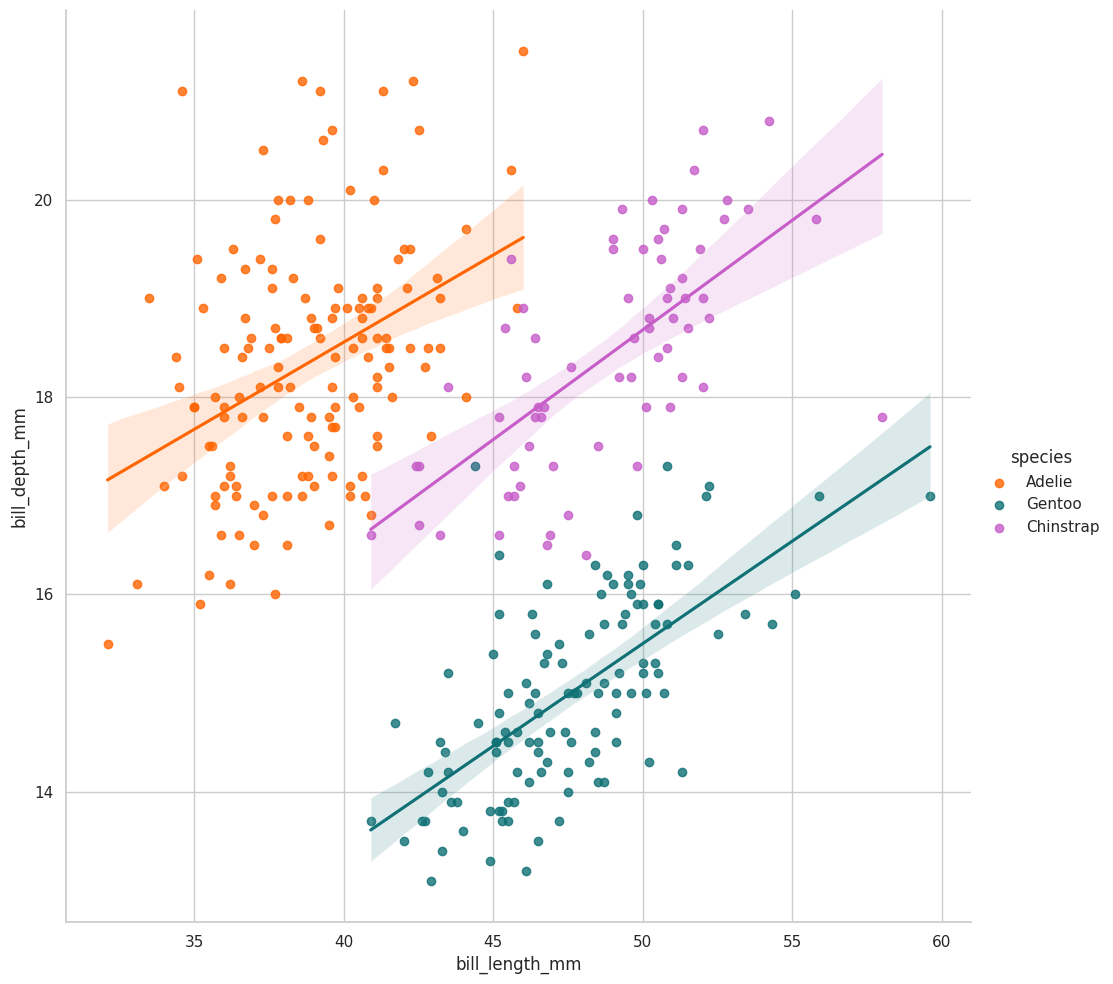

In [139]:
sns.lmplot(
    data=penguins_df_gentoo,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

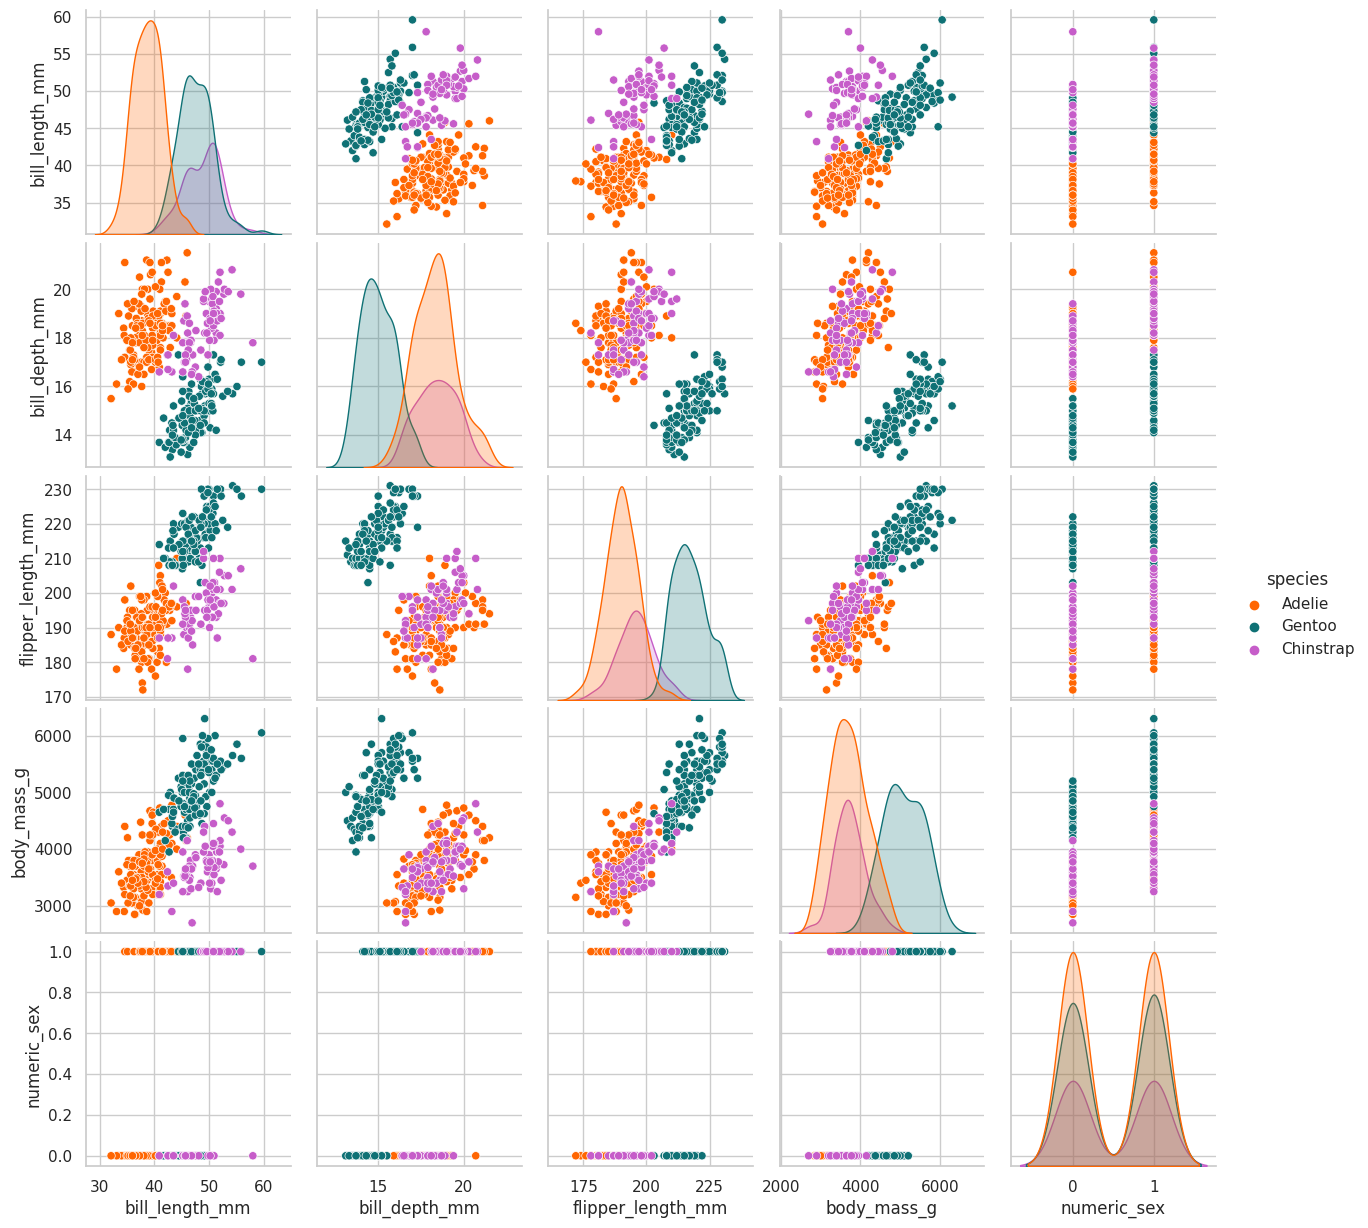

In [142]:
sns.pairplot(
    data=penguins_df.drop('year', axis=1),
    hue='species',
    palette=penguin_color
)

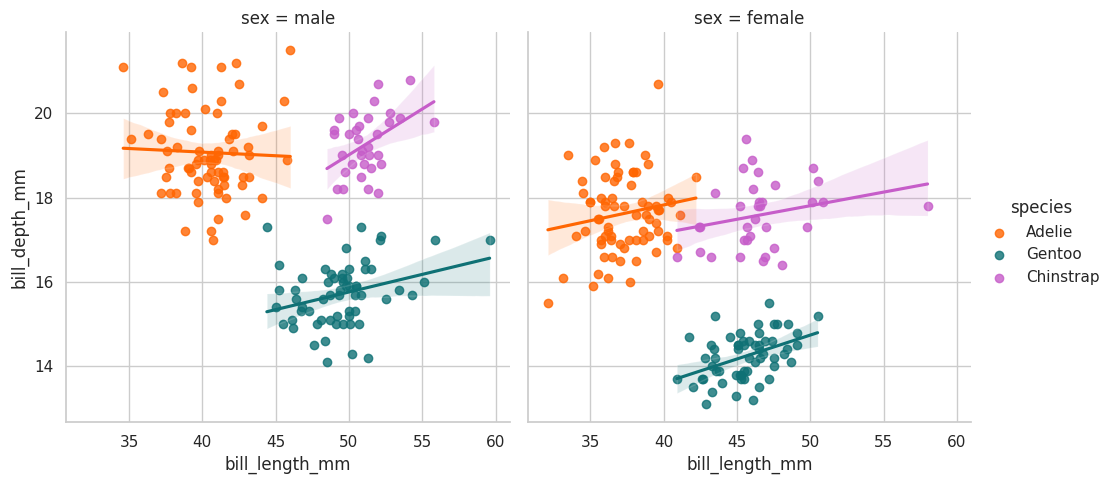

In [147]:
sns.lmplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color,
    col='sex', 
)